In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv(r"C:\Users\prabh\Desktop\data set\Employee_Salary\Salary Data.csv")

# Display the first few rows
print(df.head())


    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  


In [2]:
# Check the dataset info
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB
None


In [3]:
# Describe numerical features
print(df.describe())


              Age  Years of Experience         Salary
count  373.000000           373.000000     373.000000
mean    37.431635            10.030831  100577.345845
std      7.069073             6.557007   48240.013482
min     23.000000             0.000000     350.000000
25%     31.000000             4.000000   55000.000000
50%     36.000000             9.000000   95000.000000
75%     44.000000            15.000000  140000.000000
max     53.000000            25.000000  250000.000000


In [4]:
# Check for missing values
print(df.isnull().sum())

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64


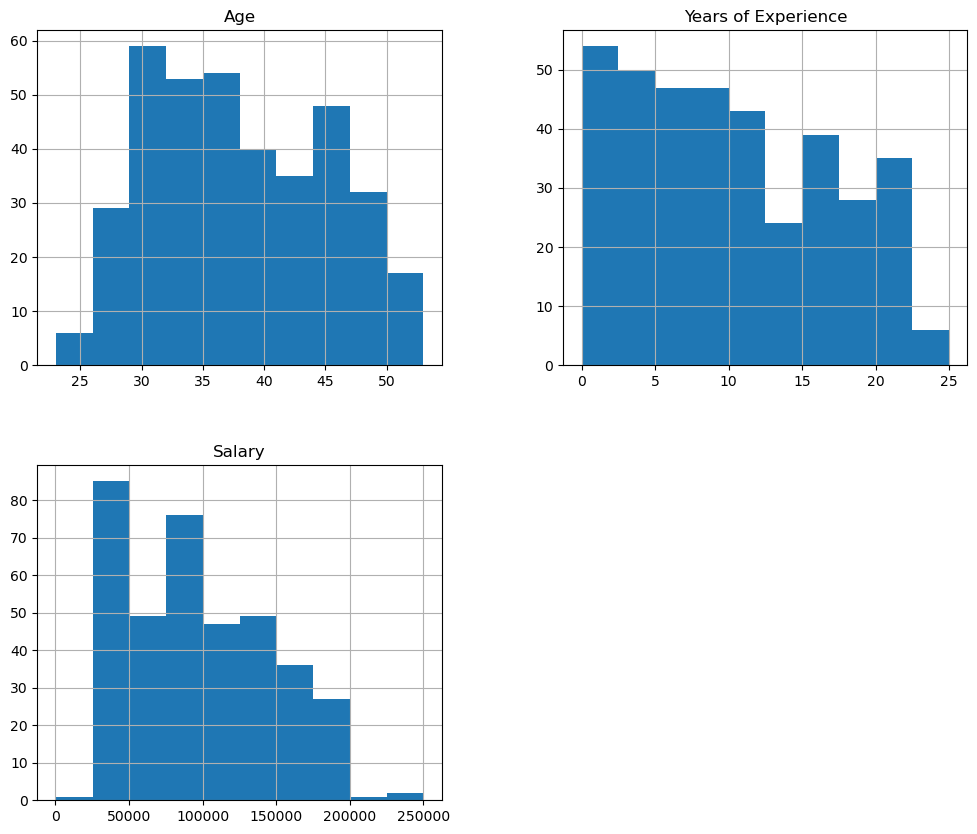

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distributions for numerical features
df.hist(figsize=(12, 10))
plt.show()


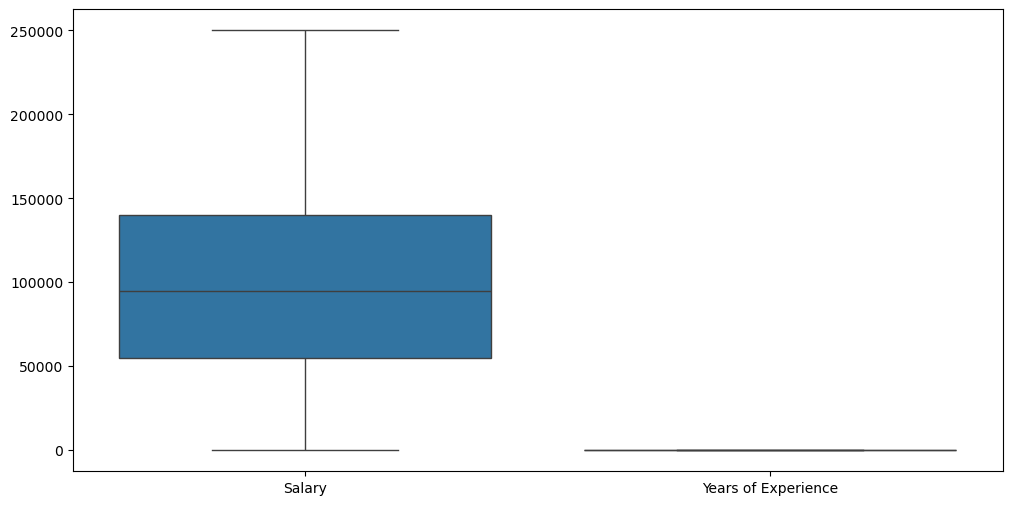

In [6]:
# Boxplot for detecting outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Salary', 'Years of Experience', 'Education Level']])  # Example features
plt.show()

In [7]:
#Fill missing values or drop rows/columns
df.fillna(method='ffill', inplace=True)  # Forward fill for missing values
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
le = LabelEncoder()
df['Gender_encoder'] = le.fit_transform(df['Gender'])
df['Education_Level_encoder'] = le.fit_transform(df['Education Level'])
df['job_role_encoded'] = le.fit_transform(df['Job Title'])
df.dtypes

Age                        float64
Gender                      object
Education Level             object
Job Title                   object
Years of Experience        float64
Salary                     float64
Gender_encoder               int32
Education_Level_encoder      int32
job_role_encoded             int32
dtype: object

In [9]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Gender_encoder,Education_Level_encoder,job_role_encoded
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0,159
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1,17
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2,130
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0,101
4,52.0,Male,Master's,Director,20.0,200000.0,1,1,22


In [10]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
df[['Years of Experience', 'Education_Level_encoder']] = scaler.fit_transform(df[['Years of Experience', 'Education_Level_encoder']])
df.head()


,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Gender_encoder,Education_Level_encoder,job_role_encoded
0,32.0,Male,Bachelor's,Software Engineer,-0.760331,90000.0,1,-0.738969,159
1,28.0,Female,Master's,Data Analyst,-1.065277,65000.0,0,0.646598,17
2,45.0,Male,PhD,Senior Manager,0.764397,150000.0,1,2.032165,130
3,36.0,Female,Bachelor's,Sales Associate,-0.455386,60000.0,0,-0.738969,101
4,52.0,Male,Master's,Director,1.526762,200000.0,1,0.646598,22


In [11]:
#Train-Test Split and Model Selection and Training Split the Data:
from sklearn.model_selection import train_test_split

# Define features and target variable
X=df[['Years of Experience','Education_Level_encoder', 'job_role_encoded']]
y = df['Salary']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)


In [12]:
#Model Selection and Training:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [13]:
#Evaluate the Model:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = rf_regressor.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 317185670.17657906
R^2 Score: 0.8655539307006663


In [14]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(rf_regressor, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation Scores:", -cv_scores)
print("Mean Cross-Validation Score:", -cv_scores.mean())


Cross-Validation Scores: [4.82394867e+08 4.78691660e+08 1.31625849e+08 1.04510166e+08
 1.09635983e+08]
Mean Cross-Validation Score: 261371704.82279223


In [15]:
#Hyperparameter Tuning

from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
random_search = RandomizedSearchCV(
    estimator=rf_regressor,
    param_distributions=param_grid,
    n_iter=10,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42
)
random_search.fit(X_train, y_train)
print("Best Hyperparameters:", random_search.best_params_)
print("Best Score:", -random_search.best_score_)


Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': 20}
Best Score: 198041157.58785656


In [16]:
# Initialize the best model
best_rf_regressor = random_search.best_estimator_

# Retrain with the best parameters
best_rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_tuned = best_rf_regressor.predict(X_test)

# Evaluate the tuned model
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print("Tuned Mean Squared Error:", mse_tuned)
print("Tuned R^2 Score:", r2_tuned)


Tuned Mean Squared Error: 307706980.64232737
Tuned R^2 Score: 0.8695716801446416


In [24]:
print("Final Model Evaluation:")
print("Tuned Mean Squared Error:", mse_tuned)
print("Tuned R^2 Score:", r2_tuned)

Final Model Evaluation:
Tuned Mean Squared Error: 307706980.64232737
Tuned R^2 Score: 0.8695716801446416
